In [1]:
from lib.data_preprocess import load_data
import glob

data_dir = r"C:\Users\Dario\Desktop\ThesiS JBP\Data"
file_list = sorted(glob.glob(f"{data_dir}/signals_for_GAN_*.mat"))

seq_len = 256

ori_data, scaler = load_data(
    "mytests",
    seq_len,
    file_list=file_list,
    step=128,           # <--- AQUÍ DEFINES OVERLAP
    max_sequences=50000 # <--- Límite para evitar 70GB RAM
)

print(len(ori_data), ori_data[0].shape)



📌 Raw concatenated data: (6144001, 6)
📌 Applied MinMax normalization
✅ Created 47999 sequences | seq_len=256, step=128
47999 (256, 6)


In [5]:

from options_TGAN import Options
from lib.TimeGAN import TimeGAN

# 1. Options
opt = Options().parse()


opt.print_freq = 1    # imprime cada iteración

# 2. Set paper-style hyperparameters
opt.lr = 1e-4
opt.beta1 = 0.5

opt.batch_size = 32
opt.iteration = 50

opt.hidden_dim = 256   # muy importante
opt.num_layer = 3

opt.n_critic = 1       # OK
opt.gp_lambda = 10.0   # OK
opt.name = "TimeGAN_real_paper_settings"

opt.w_g    = 1.0   # antes 80
opt.w_e0   = 1.0   # antes 10
opt.w_es   = 1.0   # antes 0.1, lo dejamos en la misma escala
opt.w_gamma = 0.5  # este se puede mantener


# 3. Create model
model = TimeGAN(opt, ori_data)

# 4. Train
model.train()

[INFO] Adjusted opt.z_dim to match data feature size: 6
=== PRETRAINING: Embedding + Recovery ===
[DEBUG] Loss this iteration: 0.100144
[ER] Iter 0/50 | ER Loss = 0.100144
[DEBUG] Loss this iteration: 0.034775
[ER] Iter 1/50 | ER Loss = 0.034775
[DEBUG] Loss this iteration: 0.035619
[ER] Iter 2/50 | ER Loss = 0.035619
[DEBUG] Loss this iteration: 0.022524
[ER] Iter 3/50 | ER Loss = 0.022524
[DEBUG] Loss this iteration: 0.020724
[ER] Iter 4/50 | ER Loss = 0.020724
[DEBUG] Loss this iteration: 0.020613
[ER] Iter 5/50 | ER Loss = 0.020613
[DEBUG] Loss this iteration: 0.023844
[ER] Iter 6/50 | ER Loss = 0.023844
[DEBUG] Loss this iteration: 0.018991
[ER] Iter 7/50 | ER Loss = 0.018991
[DEBUG] Loss this iteration: 0.018385
[ER] Iter 8/50 | ER Loss = 0.018385
[DEBUG] Loss this iteration: 0.017195
[ER] Iter 9/50 | ER Loss = 0.017195
[DEBUG] Loss this iteration: 0.019350
[ER] Iter 10/50 | ER Loss = 0.019350
[DEBUG] Loss this iteration: 0.019638
[ER] Iter 11/50 | ER Loss = 0.019638
[DEBUG] Loss

🧩 Generating 50 samples in 1 batches of 64...
  ✅ Batch 1/1 generated (50 samples)


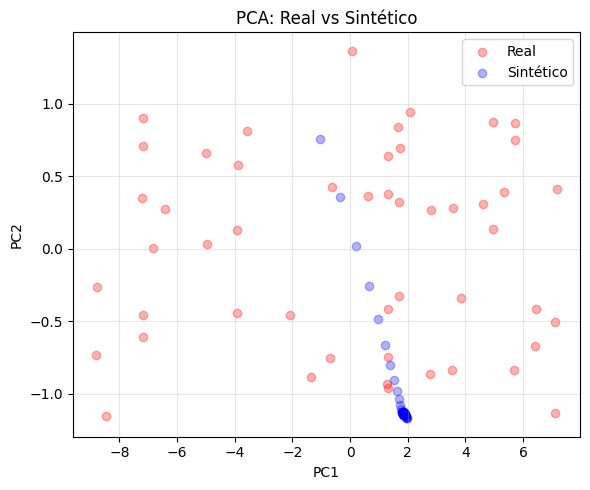

🌀 Ejecutando t-SNE (puede tardar unos segundos)...
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...


c:\Users\Dario\Desktop\ThesiS JBP\jordan_venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 100 samples in 8.656s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.468655
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.986694
[t-SNE] KL divergence after 500 iterations: 0.050335


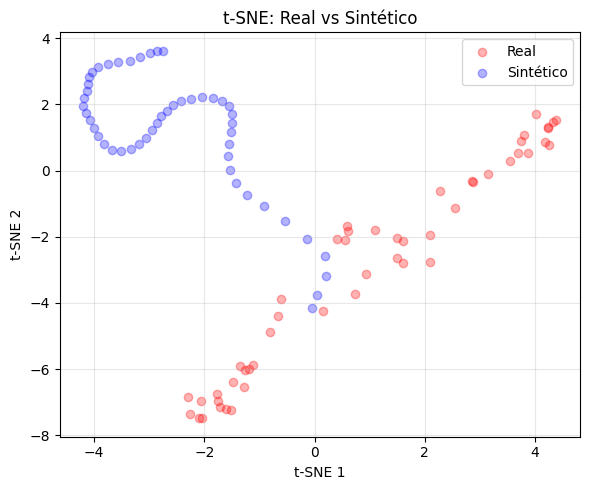

In [7]:
from generation_TGAN import safe_generation
import numpy as np

generated_data = safe_generation(model, num_samples=50, batch_size=64)

n_vis = 5000  # target

n_real = min(n_vis, len(ori_data))
n_fake = min(n_vis, len(generated_data))

idx_real = np.random.choice(len(ori_data), n_real, replace=False)
idx_fake = np.random.choice(len(generated_data), n_fake, replace=False)

ori_vis = [ori_data[i] for i in idx_real]
gen_vis = [generated_data[i] for i in idx_fake]

from visualization_TGAN import visualization

visualization(ori_vis, gen_vis, 'pca')
visualization(ori_vis, gen_vis, 'tsne')


